Statevector 1 (|+⟩): [0.70710678+0.j 0.70710678+0.j]


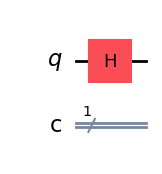

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_state_city, plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Circuit 1: State |+⟩ = (|0⟩ + |1⟩)/√2
qc1 = QuantumCircuit(1, 1)
qc1.h(0)  # Create |+⟩
state1 = Statevector(qc1)
print("Statevector 1 (|+⟩):", state1.data)
qc1.draw('mpl')



Statevector 2 (i |+⟩): [4.32978028e-17+0.70710678j 4.32978028e-17+0.70710678j]


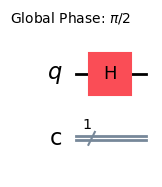

In [4]:
# Circuit 2: State e^(iπ/2) |+⟩ = i |+⟩
qc2 = QuantumCircuit(1, 1)
qc2.h(0)
qc2.global_phase = np.pi / 2  # Add global phase e^(iπ/2) = i
state2 = Statevector(qc2)
print("Statevector 2 (i |+⟩):", state2.data)
qc2.draw('mpl')


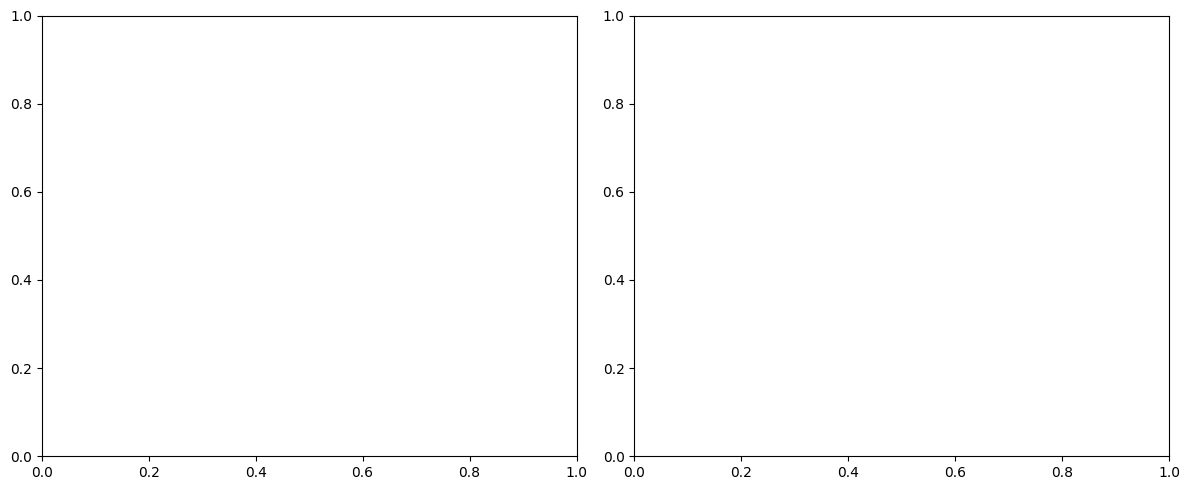

In [6]:
# Visualize statevectors
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_state_city(state1, title="Statevector |+⟩")
plt.subplot(1, 2, 2)
plot_state_city(state2, title="Statevector i |+⟩")
plt.tight_layout()
plt.show()

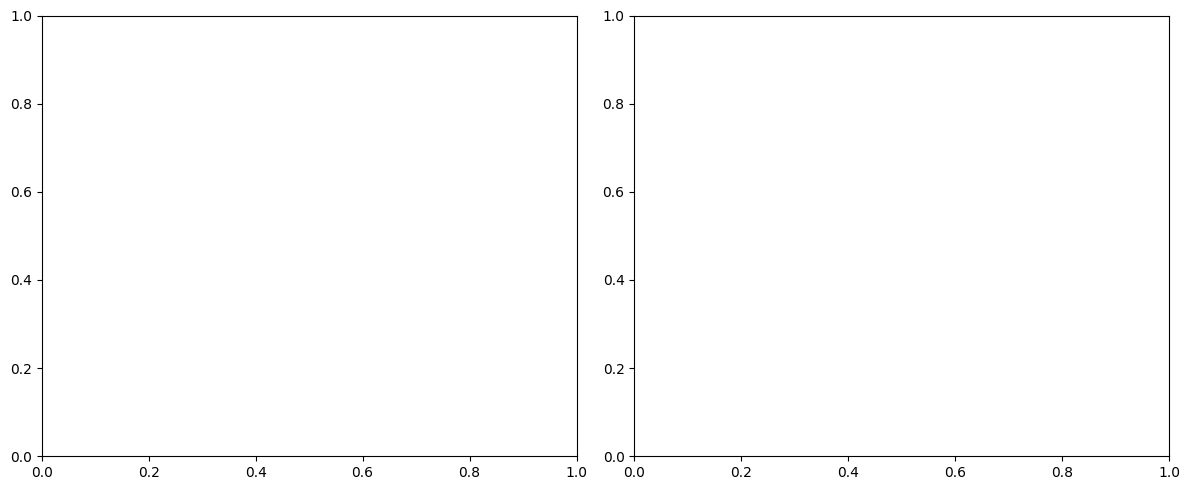

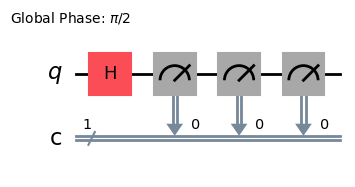

In [8]:
# Measure both circuits to compare probabilities
qc1.measure(0, 0)
qc2.measure(0, 0)
simulator = AerSimulator()
counts1 = simulator.run(qc1, shots=1000).result().get_counts()
counts2 = simulator.run(qc2, shots=1000).result().get_counts()

# Visualize measurement histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_histogram(counts1, title="Measurements |+⟩")
plt.subplot(1, 2, 2)
plot_histogram(counts2, title="Measurements i |+⟩")
plt.tight_layout()
plt.show()
qc1.draw('mpl')
qc2.draw('mpl')